In [1]:
import pyspark as ps    # for the pyspark suite
from pyspark.sql.types import *
from datetime import datetime
import json

spark = ps.sql.SparkSession.builder \
            .master("local[4]") \
            .appName("sparkSQL exercise") \
            .getOrCreate()

sc = spark.sparkContext 

In [2]:
def apply_json(input_lst):
    try:
        return json.loads(input_lst)['animals'][0]                                               
    except:
        return None

In [3]:
# data_filepath = '../data/json_dump/output_4994.json'
data_filepath = '../src/big_json.json'


data = sc.textFile(data_filepath).map(apply_json) #reads in the json file

In [4]:
print(data)
#create a pipeline to mash dataframes

# df_temp = spark.read.json(data_filepath, multiLine = True)

PythonRDD[2] at RDD at PythonRDD.scala:53


In [5]:
#remove outer dictionary from every file


In [6]:
df = spark.read.json(data_filepath, multiLine = True)

In [7]:
df.count()

100000

In [8]:
df.show(20)

+--------------------+-----+--------------------+--------------------+----+------+--------------------+--------------------+--------+-------------------+------+--------+---------+----------------------+---------------+------+---------------------+--------------------+------+-------+---------+--------------------+----+----+--------------------+------+
|              _links|  age|          attributes|              breeds|coat|colors|             contact|         description|distance|        environment|gender|      id|     name|organization_animal_id|organization_id|photos|primary_photo_cropped|        published_at|  size|species|   status|   status_changed_at|tags|type|                 url|videos|
+--------------------+-----+--------------------+--------------------+----+------+--------------------+--------------------+--------+-------------------+------+--------+---------+----------------------+---------------+------+---------------------+--------------------+------+-------+---------+-

In [9]:
df.printSchema()

root
 |-- _links: struct (nullable = true)
 |    |-- organization: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- self: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- type: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |-- age: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- declawed: string (nullable = true)
 |    |-- house_trained: boolean (nullable = true)
 |    |-- shots_current: boolean (nullable = true)
 |    |-- spayed_neutered: boolean (nullable = true)
 |    |-- special_needs: boolean (nullable = true)
 |-- breeds: struct (nullable = true)
 |    |-- mixed: boolean (nullable = true)
 |    |-- primary: string (nullable = true)
 |    |-- secondary: string (nullable = true)
 |    |-- unknown: boolean (nullable = true)
 |-- coat: string (nullable = true)
 |-- colors: struct (nullable = true)
 |    |-- primary: string (nullable = true)
 |    |-- secondary: strin

In [10]:
# dogs = parts.map(lambda p: Row(id=p[0],
#  age=int(p[1].strip())))

In [11]:
# df.show(10)

In [52]:
df_breed = df.select('id', 'age', 'gender', 'breeds', 'description')

In [54]:
df_breed.count()

100000

In [55]:
df_clean_breed = df_breed.na.drop()

In [56]:
df_clean_breed .count()

74999

In [58]:
df_clean_breed.show()

+--------+-----+------+--------------------+--------------------+
|      id|  age|gender|              breeds|         description|
+--------+-----+------+--------------------+--------------------+
|48549327|Young|Female|[true, Chihuahua,...|Oh Snap! Snap is ...|
|48549326|Adult|  Male|[true, Labrador R...|Handsome fellow, ...|
|48549314|Young|Female|[false, Chihuahua...|Meet Sassy/MS! Th...|
|48549315| Baby|Female|[true, Chihuahua,...|Meet Dashia/MS!! ...|
|48549316| Baby|Female|[true, Chihuahua,...|Meet Misty/MS!! T...|
|48549317| Baby|Female|[true, Maltese, C...|Meet Macy/MS! Thi...|
|48549312| Baby|  Male|[true, German She...|Willie is an ador...|
|48549306|Adult|  Male|[false, Hound,, f...|Interested in ado...|
|48549307|Adult|  Male|[false, Dachshund...|Interested in ado...|
|48549309|Adult|  Male|[false, Dachshund...|Interested in ado...|
|48549310|Adult|  Male|[true, Australian...|Interested in ado...|
|48549311|Young|Female|[false, Rottweile...|Interested in ado...|
|48549288|

In [60]:
df_clean_breed.printSchema()

root
 |-- id: long (nullable = true)
 |-- age: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- breeds: struct (nullable = true)
 |    |-- mixed: boolean (nullable = true)
 |    |-- primary: string (nullable = true)
 |    |-- secondary: string (nullable = true)
 |    |-- unknown: boolean (nullable = true)
 |-- description: string (nullable = true)



In [144]:
# dropped_df.createOrReplaceTempView("dog_data")
df_clean_breed.createOrReplaceTempView("breed_data")

In [152]:
result = spark.sql('''SELECT gender, breeds,age,
                        COUNT(*) AS Number
                        FROM breed_data
                        GROUP BY gender, breeds, age
                        ORDER BY COUNT(*) desc''')
result.show(20)

+------+--------------------+-----+------+
|gender|              breeds|  age|Number|
+------+--------------------+-----+------+
|Female|[true, Chihuahua,...| Baby|  9998|
|  Male|[false, Dachshund...|Adult|  9998|
|  Male|[false, Hound,, f...|Adult|  4999|
|  Male|[true, Labrador R...|Adult|  4999|
|  Male|[true, Australian...|Adult|  4999|
|Female|[false, Rottweile...|Young|  4999|
|Female|[true, Maltese, C...| Baby|  4999|
|Female|[false, Chihuahua...|Young|  4999|
|  Male|[true, German She...| Baby|  4999|
|Female|[true, Chihuahua,...|Young|  4999|
|Female|[true, Jack Russe...| Baby|  4758|
|Female|[false, Pit Bull ...|Adult|  2622|
|Female|[false, German Sh...| Baby|  2620|
|  Male|[false, Terrier,,...|Young|  2620|
|Female|[true, Terrier,, ...|Young|  2379|
|  Male|[false, Pit Bull ...|Adult|     2|
|  Male|[true, Boxer, Can...| Baby|     1|
|Female|[true, Pit Bull T...|Adult|     1|
|  Male|[true, Labrador R...|Adult|     1|
|Female|[true, Hound, Lab...|Young|     1|
+------+---

In [72]:
result = spark.sql('''SELECT gender, 
                            age,
                            COUNT(*) AS Count
                        FROM dog_data
                        GROUP BY gender, age
                        ORDER BY count desc''')
result.show(20)

+------+------+-----+
|gender|   age|Count|
+------+------+-----+
|  Male| Adult|25001|
|Female|  Baby|22375|
|Female| Young|17379|
|  Male|  Baby| 5000|
|Female| Adult| 2623|
|  Male| Young| 2620|
|Female|Senior|    1|
+------+------+-----+



In [73]:
result.show()

+------+------+-----+
|gender|   age|Count|
+------+------+-----+
|  Male| Adult|25001|
|Female|  Baby|22375|
|Female| Young|17379|
|  Male|  Baby| 5000|
|Female| Adult| 2623|
|  Male| Young| 2620|
|Female|Senior|    1|
+------+------+-----+



In [74]:
result.head(20)

[Row(gender='Male', age='Adult', Count=25001),
 Row(gender='Female', age='Baby', Count=22375),
 Row(gender='Female', age='Young', Count=17379),
 Row(gender='Male', age='Baby', Count=5000),
 Row(gender='Female', age='Adult', Count=2623),
 Row(gender='Male', age='Young', Count=2620),
 Row(gender='Female', age='Senior', Count=1)]

In [158]:
plot_breed = result.toPandas()
plot_breed['Number']
plot_breed.dropna(inplace=True)

In [159]:
plot_breed

,gender,breeds,age,Number
0,Female,"(True, Chihuahua, None, False)",Baby,9998
1,Male,"(False, Dachshund, None, False)",Adult,9998
2,Male,"(True, German Shepherd Dog, None, False)",Baby,4999
3,Male,"(False, Hound, None, False)",Adult,4999
4,Female,"(True, Maltese, Chihuahua, False)",Baby,4999
5,Female,"(False, Chihuahua, None, False)",Young,4999
6,Male,"(True, Labrador Retriever, Hound, False)",Adult,4999
7,Male,"(True, Australian Shepherd, None, False)",Adult,4999
8,Female,"(False, Rottweiler, None, False)",Young,4999
9,Female,"(True, Chihuahua, Mixed Breed, False)",Young,4999


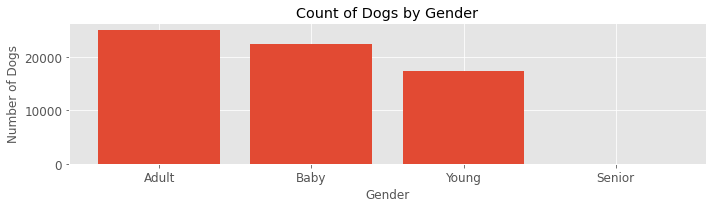

In [95]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(10,3))
ax.bar(x = plot_gender['age'], height=plot_gender['Count'])
ax.set_title("Count of Dogs by Gender")

ax.set_xlabel('Gender')
ax.set_ylabel('Number of Dogs')
plt.tight_layout()
plt.show()

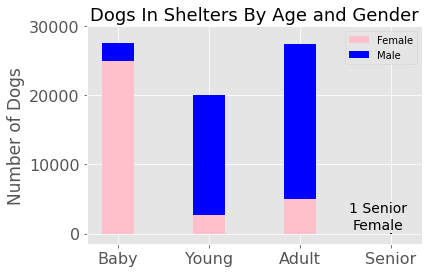

<Figure size 432x288 with 0 Axes>

In [139]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.close('all')
N = 4
menMeans = (25001, 2620, 5000, 0)
womenMeans = (2623, 17379, 22375, 1)
menStd = (1, 1, 1, 100)
womenStd = (1, 1, 1, 100)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd, color=['pink'])
p2 = plt.bar(ind, womenMeans, width,bottom=menMeans, yerr=womenStd, color=['blue'])

plt.ylabel('Number of Dogs', fontsize=17)
plt.title('Dogs In Shelters By Age and Gender', fontsize=18)
plt.xticks(ind, ('Baby', 'Young', 'Adult', 'Senior'))
plt.yticks(np.arange(0, 35000, 10000))
plt.figtext(0.8, 0.25, 
            "1 Senior", 
            horizontalalignment ="center",  
            verticalalignment ="center",  
            wrap = True, fontsize = 14,  
            color ="black") 
plt.figtext(0.8, 0.19, 
            "Female", 
            horizontalalignment ="center",  
            verticalalignment ="center",  
            wrap = True, fontsize = 14,  
            color ="black") 
plt.legend((p1[0], p2[0]), ('Female', 'Male'))

plt.show()
plt.savefig('../src/readme/by_age_and_gender');

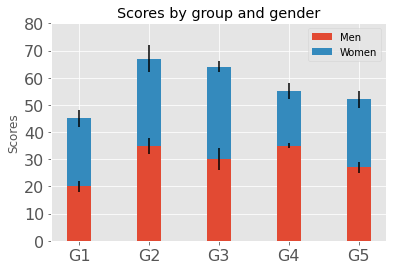

In [114]:

plt.figtext(0.55, 0.7, 
            "1 Senior Female", 
            horizontalalignment ="right",  
            verticalalignment ="center",  
            wrap = True, fontsize = 14,  
            color ="black") 



import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()